In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
import pickle

In [7]:
audi = pd.read_csv('../dataset/audi.csv')
bmw = pd.read_csv('../dataset/bmw.csv')
ford = pd.read_csv('../dataset/ford.csv')
hyundai = pd.read_csv('../dataset/hyundi.csv')
mercedes = pd.read_csv('../dataset/merc.csv')
skoda = pd.read_csv('../dataset/skoda.csv')
toyota = pd.read_csv('../dataset/toyota.csv')
vw = pd.read_csv('../dataset/vw.csv')

In [8]:
audi['brand'] = 'Audi'
bmw['brand'] = 'BMW'
ford['brand'] = 'Ford'
hyundai['brand'] = 'Hyundai'
mercedes['brand'] = 'Mercedes'
skoda['brand'] = 'Skoda'
toyota['brand'] = 'Toyota'
vw['brand'] = 'Volkswagen'

In [9]:
whole_dataset = pd.concat([audi,bmw,ford,hyundai,mercedes,skoda,toyota,vw])
whole_dataset.drop(columns=['tax(£)','tax'], axis=1, inplace=True)

In [10]:
column_names = ['brand','model','mileage','transmission','fuelType','mpg','engineSize','price']

In [11]:
whole_dataset = whole_dataset.reindex(columns = column_names)
whole_dataset

,brand,model,mileage,transmission,fuelType,mpg,engineSize,price
0,Audi,A1,15735,Manual,Petrol,55.4,1.4,12500
1,Audi,A6,36203,Automatic,Diesel,64.2,2.0,16500
2,Audi,A1,29946,Manual,Petrol,55.4,1.4,11000
3,Audi,A4,25952,Automatic,Diesel,67.3,2.0,16800
4,Audi,A3,1998,Manual,Petrol,49.6,1.0,17300
...,...,...,...,...,...,...,...,...
15152,Volkswagen,Eos,74000,Manual,Diesel,58.9,2.0,5990
15153,Volkswagen,Fox,88102,Manual,Petrol,46.3,1.2,1799
15154,Volkswagen,Fox,70000,Manual,Petrol,42.0,1.4,1590
15155,Volkswagen,Fox,82704,Manual,Petrol,46.3,1.2,1250


In [12]:
whole_dataset['model'].unique()

array([' A1', ' A6', ' A4', ' A3', ' Q3', ' Q5', ' A5', ' S4', ' Q2',
       ' A7', ' TT', ' Q7', ' RS6', ' RS3', ' A8', ' Q8', ' RS4', ' RS5',
       ' R8', ' SQ5', ' S8', ' SQ7', ' S3', ' S5', ' A2', ' RS7',
       ' 5 Series', ' 6 Series', ' 1 Series', ' 7 Series', ' 2 Series',
       ' 4 Series', ' X3', ' 3 Series', ' X5', ' X4', ' i3', ' X1', ' M4',
       ' X2', ' X6', ' 8 Series', ' Z4', ' X7', ' M5', ' i8', ' M2',
       ' M3', ' M6', ' Z3', ' Fiesta', ' Focus', ' Puma', ' Kuga',
       ' EcoSport', ' C-MAX', ' Mondeo', ' Ka+', ' Tourneo Custom',
       ' S-MAX', ' B-MAX', ' Edge', ' Tourneo Connect', ' Grand C-MAX',
       ' KA', ' Galaxy', ' Mustang', ' Grand Tourneo Connect', ' Fusion',
       ' Ranger', ' Streetka', ' Escort', ' Transit Tourneo', ' I20',
       ' Tucson', ' I10', ' IX35', ' I30', ' I40', ' Ioniq', ' Kona',
       ' Veloster', ' I800', ' IX20', ' Santa Fe', ' Accent', ' Terracan',
       ' Getz', ' Amica', ' SLK', ' S Class', ' SL CLASS', ' G Class',
       

In [13]:
"""# Converting type of columns to category
whole_dataset['brand'] = whole_dataset['brand']
whole_dataset['model'] = whole_dataset['model']
whole_dataset['transmission'] = whole_dataset['transmission']
whole_dataset['fuelType'] = whole_dataset['fuelType'] 
  """
lenc1 = preprocessing.LabelEncoder()
lenc2 = preprocessing.LabelEncoder()
lenc3 = preprocessing.LabelEncoder()
lenc4 = preprocessing.LabelEncoder()

# Assigning numerical values and storing it in another columns
whole_dataset['brand'] = lenc1.fit_transform(whole_dataset['brand'])
whole_dataset['model'] = lenc2.fit_transform(whole_dataset['model'])
whole_dataset['transmission'] = lenc3.fit_transform(whole_dataset['transmission'])
whole_dataset['fuelType'] = lenc4.fit_transform(whole_dataset['fuelType'])


In [14]:
whole_dataset

,brand,model,mileage,transmission,fuelType,mpg,engineSize,price
0,0,9,15735,1,4,55.4,1.4,12500
1,0,14,36203,0,0,64.2,2.0,16500
2,0,9,29946,1,4,55.4,1.4,11000
3,0,12,25952,0,0,67.3,2.0,16800
4,0,11,1998,1,4,49.6,1.0,17300
...,...,...,...,...,...,...,...,...
15152,7,48,74000,1,0,58.9,2.0,5990
15153,7,53,88102,1,4,46.3,1.2,1799
15154,7,53,70000,1,4,42.0,1.4,1590
15155,7,53,82704,1,4,46.3,1.2,1250


In [15]:
whole_dataset

,brand,model,mileage,transmission,fuelType,mpg,engineSize,price
0,0,9,15735,1,4,55.4,1.4,12500
1,0,14,36203,0,0,64.2,2.0,16500
2,0,9,29946,1,4,55.4,1.4,11000
3,0,12,25952,0,0,67.3,2.0,16800
4,0,11,1998,1,4,49.6,1.0,17300
...,...,...,...,...,...,...,...,...
15152,7,48,74000,1,0,58.9,2.0,5990
15153,7,53,88102,1,4,46.3,1.2,1799
15154,7,53,70000,1,4,42.0,1.4,1590
15155,7,53,82704,1,4,46.3,1.2,1250


In [16]:
X = whole_dataset[['brand', 'model','mileage','transmission','fuelType','mpg','engineSize']]
y = whole_dataset['price']


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 7)

In [18]:
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [19]:
model = RandomForestRegressor()
model.fit(X_train_scaled, np.log(y_train))

RandomForestRegressor()

In [20]:
y_pred = model.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("mean_absolute_error: %.2f" % mean_absolute_error(y_test, y_pred))


Mean squared error: 411016230.19
mean_absolute_error: 17668.98


c:\Users\ykays\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


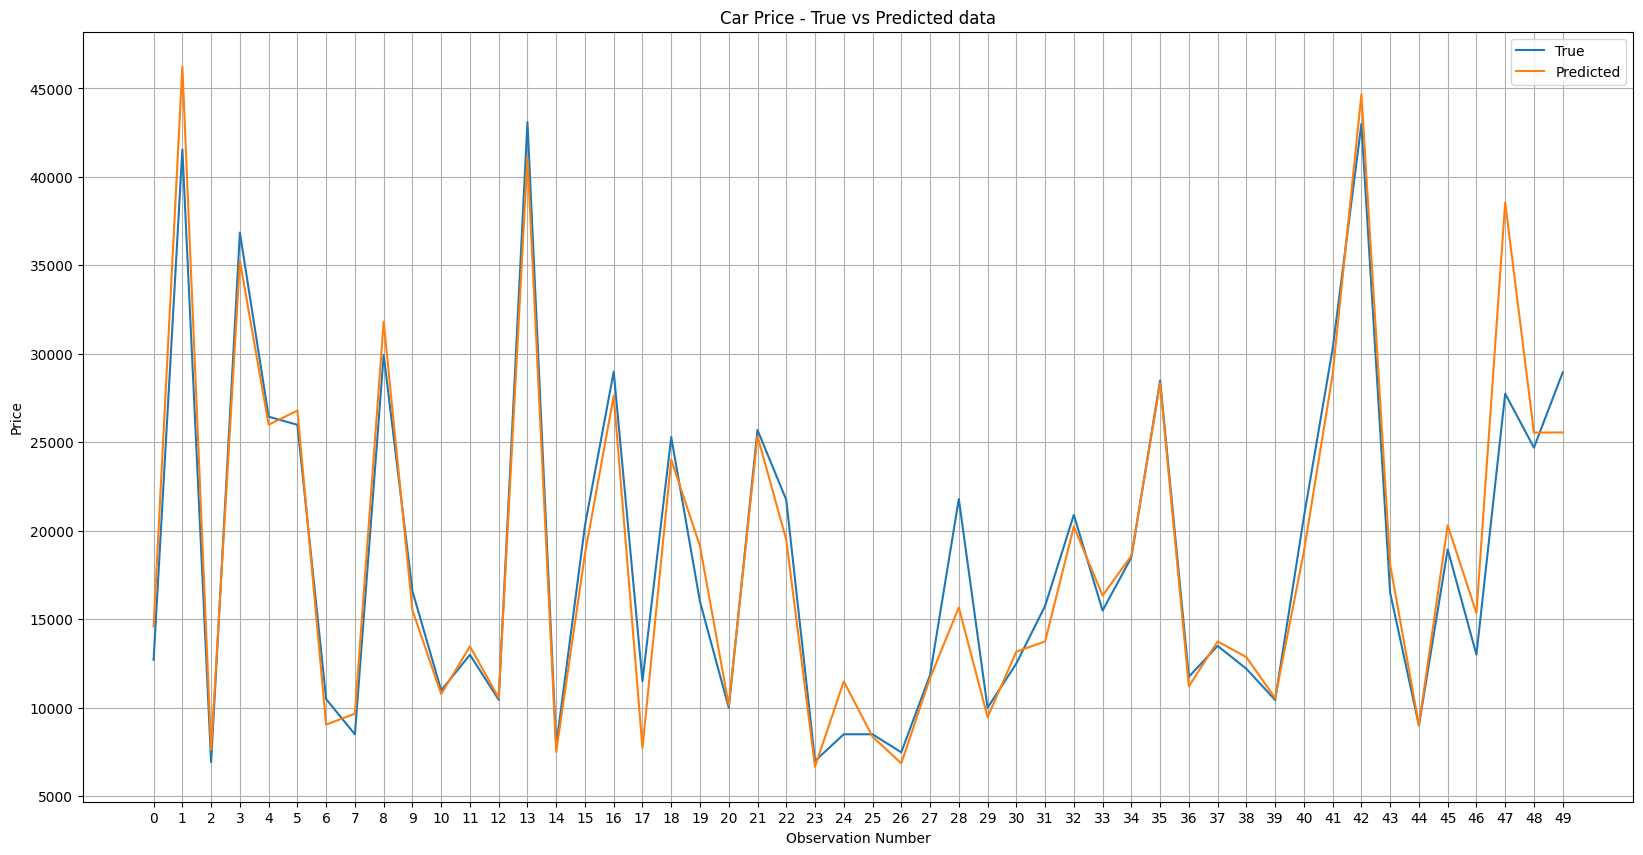

In [21]:
y_pred = np.exp(model.predict(X_test_scaled))
number_of_observations=50
x_ax = range(len(y_test[:number_of_observations]))

plt.figure(figsize=(20,10))
plt.plot(x_ax, y_test[:number_of_observations], label="True")
plt.plot(x_ax, y_pred[:number_of_observations], label="Predicted")
plt.title("Car Price - True vs Predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.xticks(np.arange(number_of_observations))
plt.legend()
plt.grid()
plt.show()

In [22]:
pickle.dump(model, open('model.pkl', 'wb'))